In [16]:
import os
import pickle
import numpy as np
from tqdm.notebook import tqdm
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img , img_to_array
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.text import Tokenizer 
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import Sequence
from tensorflow.keras.models import Sequential , Model
from tensorflow.keras.layers import Conv2D , Activation , Dropout , Flatten , Dense , Input , Layer
from tensorflow.keras.layers import Embedding, LSTM, add, Concatenate, Reshape, concatenate, Bidirectional
from tensorflow.keras.applications import VGG16, ResNet50, DenseNet201
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
import warnings
from tensorflow.keras.layers import GlobalAveragePooling2D
from tensorflow.keras.layers import MaxPooling2D
import matplotlib.pyplot as plt
import seaborn as sns
from textwrap import wrap
from tensorflow.keras.utils import plot_model

In [3]:
# extract image features

In [5]:
# load vgg16 model
model = VGG16()
# restructure the model
model = Model(inputs=model.inputs, outputs=model.layers[-2].output) 
# summarize
print(model.summary())

553467096/553467096 [==============================] - 57s 0us/step
Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                           

In [9]:
import os
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

data\captions.txt
data\Images\1000268201_693b08cb0e.jpg
data\Images\1001773457_577c3a7d70.jpg
data\Images\1002674143_1b742ab4b8.jpg
data\Images\1003163366_44323f5815.jpg
data\Images\1007129816_e794419615.jpg
data\Images\1007320043_627395c3d8.jpg
data\Images\1009434119_febe49276a.jpg
data\Images\1012212859_01547e3f17.jpg
data\Images\1015118661_980735411b.jpg
data\Images\1015584366_dfcec3c85a.jpg
data\Images\101654506_8eb26cfb60.jpg
data\Images\101669240_b2d3e7f17b.jpg
data\Images\1016887272_03199f49c4.jpg
data\Images\1019077836_6fc9b15408.jpg
data\Images\1019604187_d087bf9a5f.jpg
data\Images\1020651753_06077ec457.jpg
data\Images\1022454332_6af2c1449a.jpg
data\Images\1022454428_b6b660a67b.jpg
data\Images\1022975728_75515238d8.jpg
data\Images\102351840_323e3de834.jpg
data\Images\1024138940_f1fefbdce1.jpg
data\Images\102455176_5f8ead62d5.jpg
data\Images\1026685415_0431cbf574.jpg
data\Images\1028205764_7e8df9a2ea.jpg
data\Images\1030985833_b0902ea560.jpg
data\Images\103106960_e8a41d64f8.jpg

In [17]:
image_path = '/data/images'

In [23]:
data = pd.read_csv( 'data/captions.txt')

In [24]:
data.head()

,image,caption
0,1000268201_693b08cb0e.jpg,A child in a pink dress is climbing up a set o...
1,1000268201_693b08cb0e.jpg,A girl going into a wooden building .
2,1000268201_693b08cb0e.jpg,A little girl climbing into a wooden playhouse .
3,1000268201_693b08cb0e.jpg,A little girl climbing the stairs to her playh...
4,1000268201_693b08cb0e.jpg,A little girl in a pink dress going into a woo...


In [28]:
def readImage(path,img_size=224):
    img = load_img(path,color_mode='rgb',target_size=(img_size,img_size))
    img = img_to_array(img)
    img = img/255.
    
    return img

def display_images(temp_df):
    temp_df = temp_df.reset_index(drop=True)
    plt.figure(figsize = (20 , 20))
    n = 0
    for i in range(15):
        n+=1
        plt.subplot(5 , 5, n)
        plt.subplots_adjust(hspace = 0.7, wspace = 0.3)
        image = readImage(f"data/images/{temp_df.image[i]}")
        plt.imshow(image)
        plt.title("\n".join(wrap(temp_df.caption[i], 20)))
        plt.axis("off")

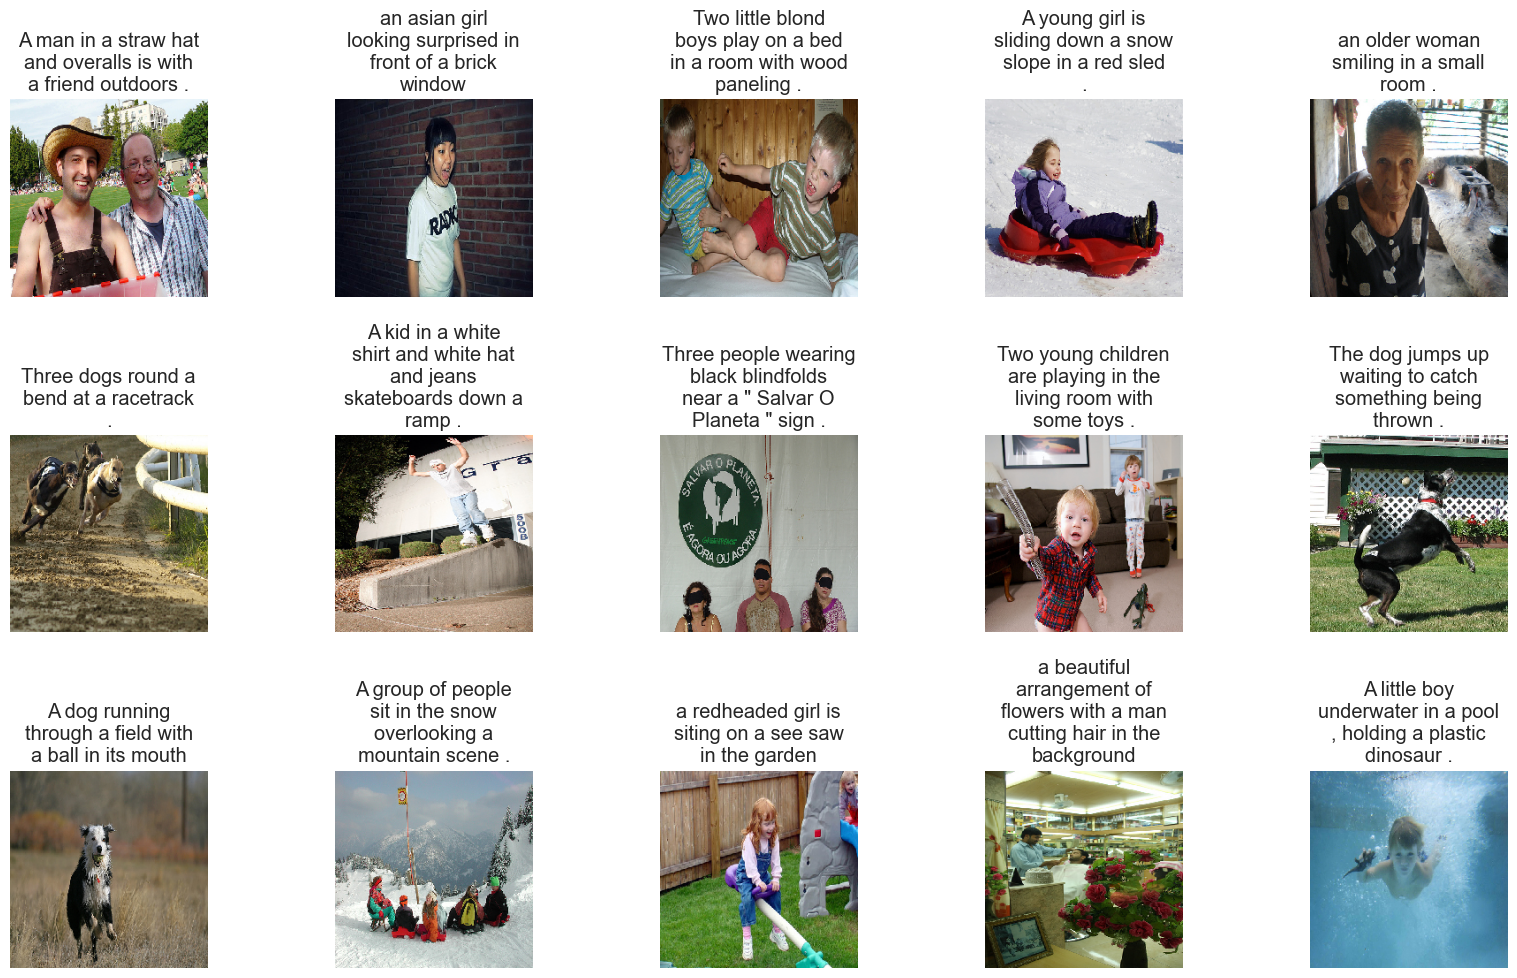

In [29]:
display_images(data.sample(15))